In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/MOCK_DATA (3).csv')

In [ ]:
# first 5 rows in the dataframe
customer_data.head()

,id,Name,email,gender,age,Phone number,Visitor Type,Reserved Activities,Reservation Duration,Reservation Status,Feedback and Evaluation,Reservation Date
0,1,Glen Camelli,gcamelli0@archive.org,male,17,150-115-0317,New Visitor,Coworking Space,5,Confirmed,6,4/4/2023
1,2,Saunder Thirtle,sthirtle1@hatena.ne.jp,female,26,288-483-2108,New Visitor,Coworking Space,7,Pending,7,5/17/2023
2,3,Therine Veque,tveque2@google.es,male,48,812-765-6319,Occasional Visitor,XR Studio,4,Canceled,2,1/5/2023
3,4,Kellen Bisco,kbisco3@webs.com,male,30,749-995-3064,Occasional Visitor,Podcast Space,1,Canceled,10,7/16/2023
4,5,Johny Arunowicz,jarunowicz4@scribd.com,female,30,814-801-4578,New Visitor,Design Lab,6,Pending,2,6/26/2023


In [ ]:
customer_data.shape

(1000, 12)

In [ ]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       1000 non-null   int64 
 1   Name                     1000 non-null   object
 2   email                    1000 non-null   object
 3   gender                   1000 non-null   object
 4   age                      1000 non-null   int64 
 5   Phone number             1000 non-null   object
 6   Visitor Type             1000 non-null   object
 7   Reserved Activities      1000 non-null   object
 8   Reservation Duration     1000 non-null   int64 
 9   Reservation Status       1000 non-null   object
 10  Feedback and Evaluation  1000 non-null   int64 
 11  Reservation Date         1000 non-null   object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB


In [ ]:
# checking for missing values
customer_data.isnull().sum()

id                         0
Name                       0
email                      0
gender                     0
age                        0
Phone number               0
Visitor Type               0
Reserved Activities        0
Reservation Duration       0
Reservation Status         0
Feedback and Evaluation    0
Reservation Date           0
dtype: int64

In [ ]:
X = customer_data.iloc[:,[4,7]].values

In [ ]:
print(X)

[[17 'Coworking Space']
 [26 'Coworking Space']
 [48 'XR Studio']
 ...
 [41 'Coworking Space']
 [19 'Calligraphy Design Club']
 [49 'Coworking Space']]


In [ ]:
category_mapping = {
    'Calligraphy Design Club': 1,
    'Podcast Space': 2,
    'Coworking Space': 3,
    'AI Art Club': 4,
    'Design Lab': 5,
    'XR Studio': 6,
    'Resource Center': 7,
    'Pitch Zone': 8
}



In [ ]:
# Convert the second column to numerical values
for row in X:
    row[1] = category_mapping.get(row[1], None)

In [ ]:
print(X)

[[17 3]
 [26 3]
 [48 6]
 ...
 [41 3]
 [19 1]
 [49 3]]


In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

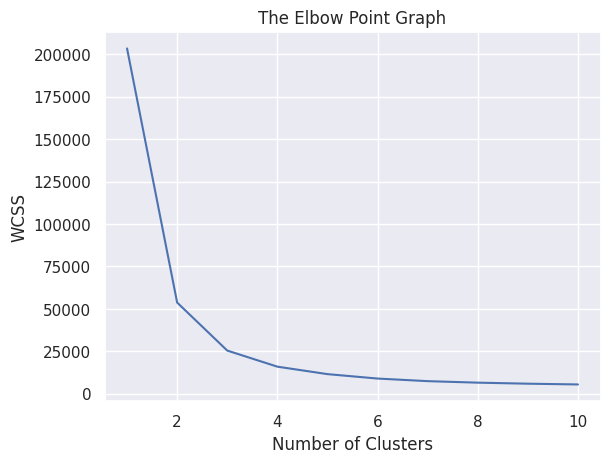

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[1 1 2 0 0 0 0 0 2 2 2 1 1 2 1 0 1 1 0 0 1 0 1 2 0 1 0 2 2 2 1 1 0 0 1 0 0
 0 2 1 1 2 2 2 0 2 1 2 0 1 0 1 2 0 0 0 0 1 0 1 0 2 1 2 2 1 2 0 0 2 0 1 1 1
 2 0 0 1 0 2 1 2 2 2 2 2 0 1 2 0 1 2 0 0 1 2 1 0 1 0 0 2 2 0 1 2 1 0 1 1 2
 2 0 1 2 0 1 0 0 0 2 1 0 1 2 1 0 2 0 2 0 2 2 2 1 2 1 2 0 0 1 0 0 0 0 2 1 2
 0 1 1 0 2 1 0 1 0 2 1 2 1 0 1 1 2 1 2 0 2 0 2 1 2 0 0 1 0 0 2 2 2 1 2 2 2
 2 0 2 2 2 0 0 1 1 0 0 0 1 0 2 2 0 0 1 2 1 0 2 1 2 1 2 0 1 1 1 2 1 0 0 1 0
 0 2 0 2 0 1 0 1 2 2 0 1 2 0 1 2 2 1 0 1 0 1 2 1 1 1 0 2 1 2 1 0 2 2 0 2 1
 0 1 1 1 1 0 0 0 2 0 0 0 1 1 2 0 2 0 0 1 2 1 0 0 2 0 2 1 2 2 2 0 0 0 0 0 1
 0 1 2 1 2 2 0 1 2 0 2 0 0 1 2 0 0 0 1 2 2 0 1 2 0 0 2 0 0 0 2 2 2 2 0 2 2
 2 1 0 2 0 1 1 1 0 1 1 0 1 1 0 1 1 2 0 2 2 2 2 2 2 0 0 1 0 1 1 1 0 1 2 2 2
 0 1 1 1 2 0 2 2 2 2 2 1 1 1 0 0 0 0 2 1 2 0 2 2 1 2 2 0 2 2 2 1 0 2 1 2 0
 2 2 1 2 0 0 0 2 1 0 0 2 0 1 1 2 2 2 2 2 0 2 0 2 1 1 0 0 0 1 2 2 1 2 1 1 2
 0 0 1 2 2 1 1 0 0 2 0 1 2 0 2 2 0 2 2 1 1 0 2 1 2 0 1 1 1 1 0 1 2 1 2 2 0
 2 2 0 2 2 0 1 1 2 2 1 2 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


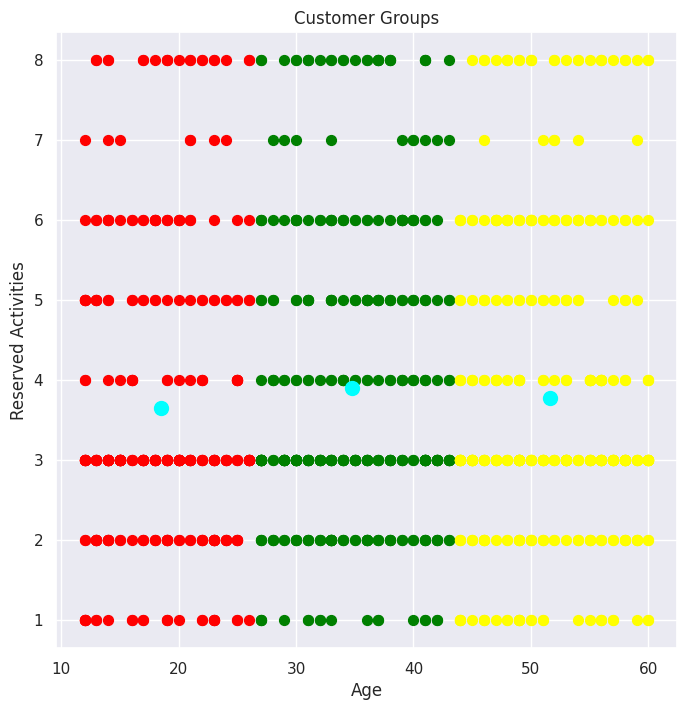

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')


# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Reserved Activities')
plt.show()